# Факторен анализ

Нуждата от факторен анализ е възникнала при обработка на данни от психо-социологични анкети. При такъв тип изследвания обикновено се предполага, че изследваното явление се описва с неизвестен (малък) брой фактори, които не можем да измерим директно. Единствено може да наблюдаваме голям брой променливи, които са функции от тях.

## Цел на ФА?

Построяване на модел, който обяснява вариация и коварция между множество наблюдения, като се представят чрез множество от фактори и тегла.

## Представяне

Търсим представяне на данните в следната форма:

$$X = FL + E$$ 

Където $X \in R^{n \times m}$ е матрицата на центрирараните и нормирани наблюдения, а $E \in R^{n \times m}$ на грешките

#### Дефиниции

- **Факторни тегла** се наричат коефициентите на разлагане на първоначалните променливи по факторите - $L \in R^{k \times m}$.
- **Факторни стойности** се наричат оценените стойности на факторите за всяко наблюделние - $F \in R^{n \times k}$
- **Общност** е относителната дисперсия на всяка променлива в новото й описание. Т.е. общностите показват доколко стойностите на конкретната променлива могат да бъдат предсказани или възстановени от факторните стойности.

#### Основни задачи

- Да се определи броят на необходимите фактори за описание на явлението
- Да се намерят факторите

### Главни компоненти

Предложеният от Хотелинг метод на главните компоненти позволява да определим до колко даден брой фактори описват изучаваното явление. Допълнително, този метод намира и самите фактори.

Главните компоненти съответстват на осите на елипсоида на разсейване на точките, представящи обектите (данните), в пространството на наблюдаваните променливи. Техният брой е равен на този на променливите. Главните компоненти могат да бъдат разглеждани като фактори, т.е. нови променливи, които са независими и описват извадката. Тази независимост позволява общата дисперсия да се представи като сбор на отделните (нови) променливи.

Чрез отстраняване на факторите, които имат дисперсия по малка от предварително определена стойност $\epsilon$, можем да редуцираме броя на променливите, като запазим задоволително описание на явлението.

#### Метод на главните компоненти

Този метод търси корелационна матрица $R$, където $r(x_i, x_j)$ е корелационният коефициент за променливите $x_i, x_j$. Сумата от собствените стойности на тази матрица е точно равна на броя на участващите променливи $p$. Теглото на даден фактор $F$ се определя от това до колко той обяснява общата вариация.

Хотелинг е показал, че намирането на факторите, при фиксирано $k$ се дава от подпространството, образувано от първите $k$ собствени вектора.  Ако разгледаме разсейването на извадката $S^2 = \sum{||x_i||^2}$, то ествествено е да търсим подпространство $H$ с размерност $k$, за фиксирано $k, 1 \leq k \leq m$, за което експерименталните точки биха се преместили минимално при своето проектиране $P$ върху него. При него най-малко би се изменила и дисперсията $S^2$:

$$S^2 = \sum{||x_i||^2 = \sum{||P_kx_i||^2 + \sum{||x_i - P_kx_i||^2}}}$$

### Критерий за избор на $K$

Изборът на $k$ се направлява от изискването да се представи възможно най-пълно да се представи най-пълно разсейването на извадката:

$$\sum_{i=1}^n||P_kx_i||^2 \geq .95\sum_{i=1}^n||x_i||^2$$

#### Критерий на Кайзер

Този критерий избира само собствените вектори със собствени стойности, които са по-големи от единица. Наистина, когато използваме корелационна матрица $\sum{a_i} = trR = m$.

### Въртения на факторите

След определяне на факторите и разлагането им по (1) се получава първоначално решение. След това се извършва процедура на въртене и окончателно се намират факторите като "завъртяно решение".

За получаване на матрицата на факторните тегла $L^{\text{rot}} = (l_{ij})$ на завъртяното решение, се използват факторните тегла за изразяване връзката между факторите и изходните величини.

## Кога да използваме ФА?

- Получаване на взаимно независими факторни променливи, които може да бъдат използвани за регресионен анализ
- Получаване на мултифакторни модели, които обясняват в голям процент изменчивостта на приближаваните данни
- Намаляване размерността на първоначалното пространство


## Пример

# Resources

- https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/regression-library/v/introduction-to-residuals-and-least-squares-regression
- https://onlinecourses.science.psu.edu/stat501/node/250
- http://onlinestatbook.com/2/regression/intro.html
- http://ci.columbia.edu/ci/premba_test/c0331/s7/s7_6.html
- https://www.probabilitycourse.com/chapter8/8_5_0_linear_regression.php
- https://web.stanford.edu/class/psych253/tutorials/FactorAnalysis.html

In [8]:
library(tidyverse)
library(corrplot)

corrplot 0.84 loaded


In [57]:
data <- as.tibble(read.table("data/personality0.txt"))

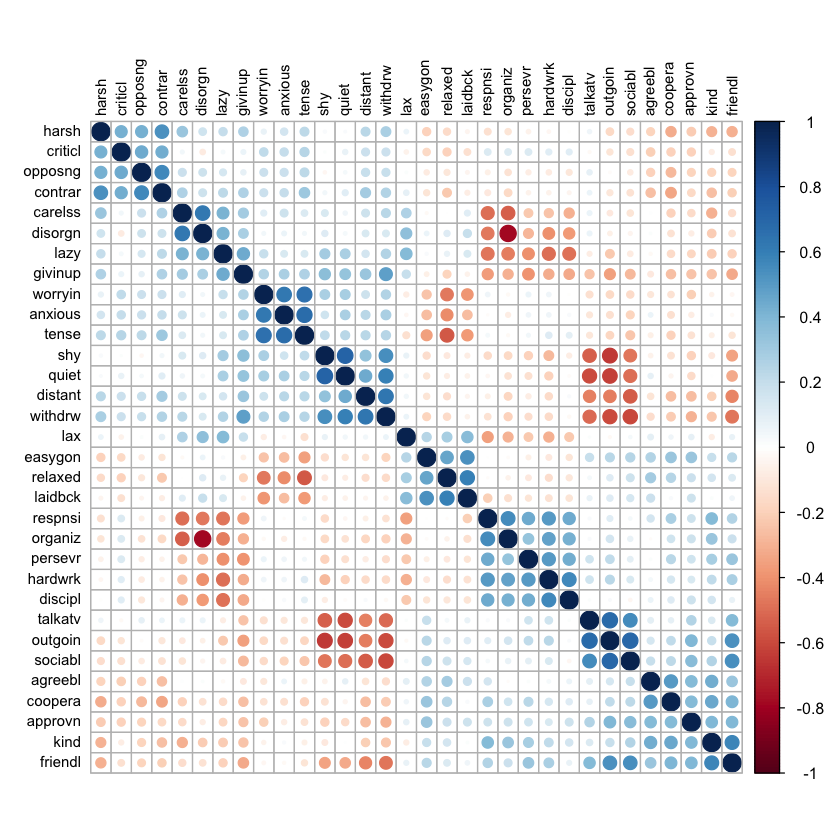

In [58]:
corrplot(cor(data), order = "hclust", tl.col='black', tl.cex=.75) 

In [59]:
data_scaled <- scale(data)

In [60]:
fit <- factanal(data_scaled, factors = 10, rotation = "none", na.action = na.omit)

In [61]:
fit$loadings


Loadings:
        Factor1 Factor2 Factor3 Factor4 Factor5 Factor6 Factor7 Factor8 Factor9
distant  0.593   0.269                           0.207  -0.101          -0.221 
talkatv -0.505  -0.513           0.270  -0.114                                 
carelss  0.460  -0.474   0.106   0.141   0.167   0.125  -0.115           0.183 
hardwrk -0.457   0.326  -0.136   0.348  -0.166          -0.315           0.170 
anxious  0.289          -0.277   0.599   0.231  -0.252          -0.104         
agreebl -0.325           0.201           0.818   0.192          -0.136         
tense    0.319          -0.391   0.628          -0.244          -0.142         
kind    -0.488   0.222                   0.376                   0.327         
opposng  0.290  -0.168           0.404  -0.217   0.330   0.189   0.194  -0.230 
relaxed -0.177           0.602  -0.311   0.155   0.187           0.176         
disorgn  0.462  -0.640   0.199           0.251          -0.302                 
outgoin -0.690  -0.435   0.12

In [62]:
fit$uniquenesses

distant   talkatv   carelss   hardwrk   anxious   agreebl     tense      kind 
0.4155265 0.3662366 0.4332678 0.3765560 0.3414400 0.1085821 0.2479509 0.4473867 
  opposng   relaxed   disorgn   outgoin   approvn       shy   discipl     harsh 
0.4135546 0.4137453 0.1676505 0.2036158 0.6424638 0.3227601 0.4613517 0.3813236 
  persevr   friendl   worryin   respnsi   contrar   sociabl      lazy   coopera 
0.4950613 0.3363327 0.3481255 0.3921460 0.4166332 0.3574583 0.4100754 0.5047471 
    quiet   organiz   criticl       lax   laidbck   withdrw   givinup   easygon 
0.2855130 0.2315167 0.5504645 0.6611637 0.0050000 0.2170508 0.4644383 0.5503472

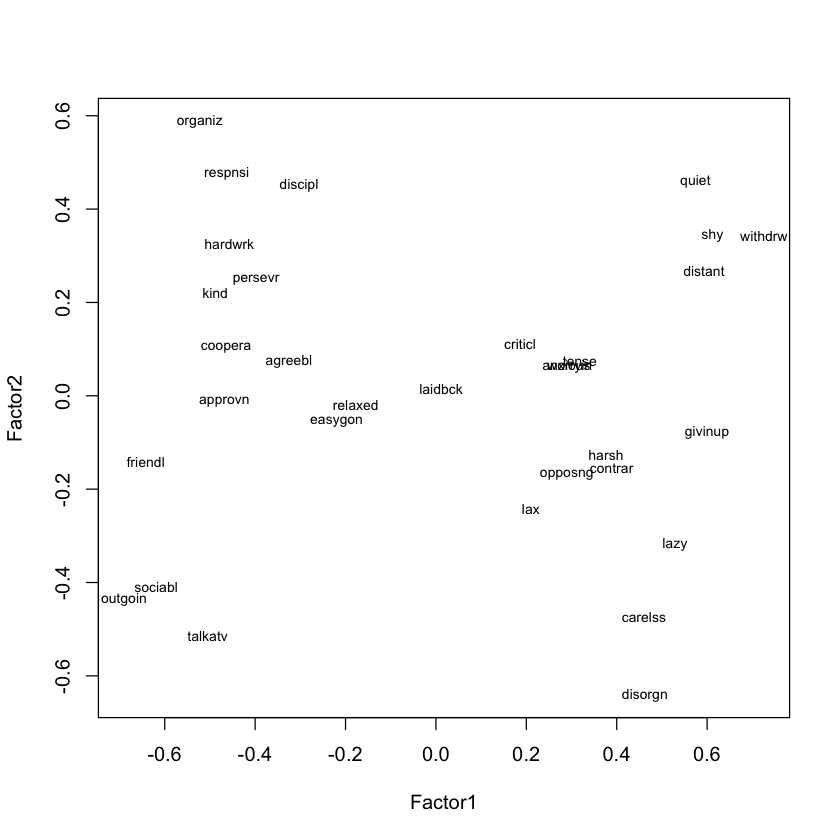

In [64]:
load = fit$loadings[,1:2]
plot(load, type="n") # set up plot 
text(load, labels=names(data), cex=.7) # add variable names

# Rotation

In [65]:
fit_rotated = factanal(data_scaled, factors = 10, rotation = "varimax", na.action = na.omit)
fit_rotated$loadings


Loadings:
        Factor1 Factor2 Factor3 Factor4 Factor5 Factor6 Factor7 Factor8 Factor9
distant  0.571           0.120  -0.149   0.120   0.231                         
talkatv -0.762                   0.109   0.109   0.128                         
carelss         -0.242   0.104  -0.102   0.630   0.180                   0.221 
hardwrk -0.185   0.716   0.125          -0.199                           0.119 
anxious  0.138           0.773                   0.135                         
agreebl                          0.736          -0.162   0.136  -0.545         
tense    0.136           0.805                   0.206  -0.152                 
kind             0.201           0.655  -0.185  -0.122           0.100         
opposng         -0.101   0.119  -0.114           0.704                  -0.190 
relaxed         -0.113  -0.535   0.270                   0.441                 
disorgn         -0.301                   0.848                                 
outgoin -0.844               

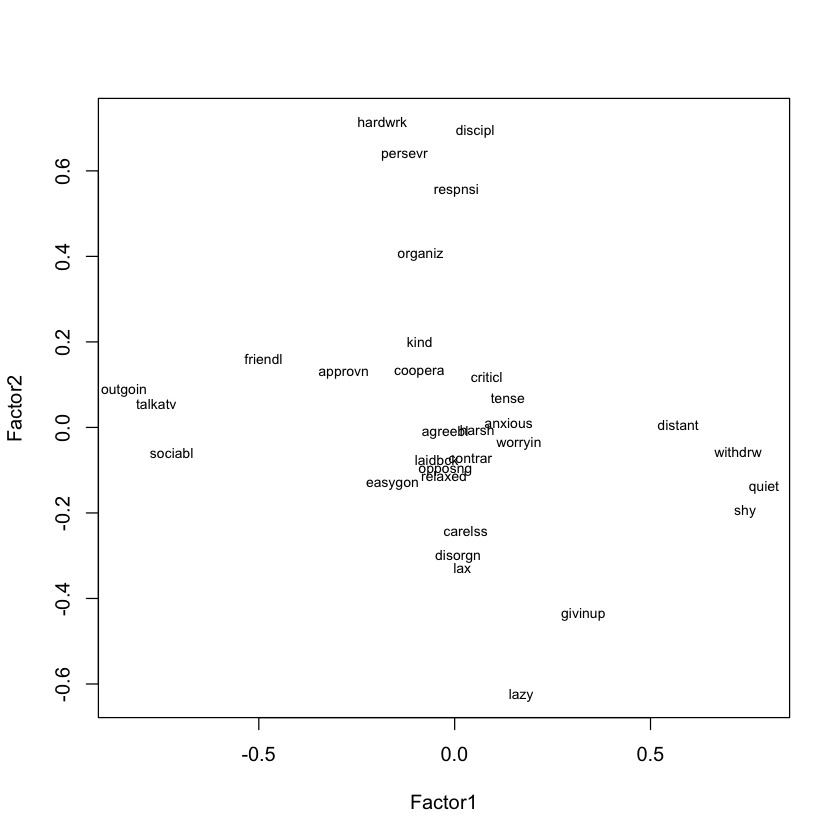

In [66]:
load = fit_rotated$loadings[,1:2]
plot(load, type="n") # set up plot 
text(load, labels=names(data), cex=.7) # add variable names